In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%config IPCompleter.greedy=True

In [2]:
tweets = pd.read_csv('train.csv')

In [3]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweets.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [5]:
tweets.dtypes.value_counts()

object    3
int64     2
dtype: int64

In [6]:
tweets_keyword = tweets['keyword']

In [7]:
tweets_keyword.value_counts().head(5)

fatalities    45
armageddon    42
deluge        42
harm          41
damage        41
Name: keyword, dtype: int64

In [8]:
tweets_keyword.value_counts(normalize=True).head(5)

fatalities    0.005959
armageddon    0.005561
deluge        0.005561
harm          0.005429
damage        0.005429
Name: keyword, dtype: float64

In [9]:
tweets_keyword.count()

7552

In [10]:
tweets_keyword.size

7613

In [11]:
tweets['keyword'].isnull().mean()

0.008012610009194798

In [12]:
tweets['text_len']=tweets['text'].str.len()

In [13]:
tweets.head(5)

,id,keyword,location,text,target,text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [14]:
tweets.corr()

,id,target,text_len
id,1.000000,0.060781,0.017393
target,0.060781,1.000000,0.181817
text_len,0.017393,0.181817,1.000000


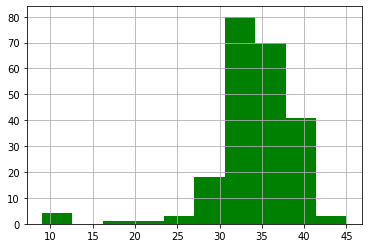

In [15]:
tweets.keyword.value_counts().hist(color='green', bins=10)

## Vemos la relacion entre la aparicion de una palabra clave y la veracidad del tweet

In [16]:
tweets.keyword.value_counts().head(5)

fatalities    45
armageddon    42
deluge        42
harm          41
damage        41
Name: keyword, dtype: int64

In [17]:
#porcentaje de keywords que terminan en target 1
keyword_grouped = tweets.loc[:,['keyword','target']].groupby('keyword').agg({'target': 'mean'})
keyword_grouped.head(5)

,target
keyword,
ablaze,0.361111
accident,0.685714
aftershock,0.000000
airplane%20accident,0.857143
ambulance,0.526316


Text(0.5, 0, 'Keyword')

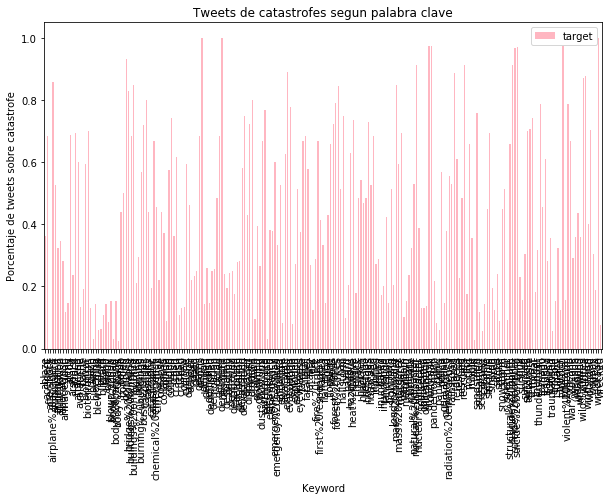

In [18]:
#en el plot se ven la cantidad de veces que una keyword corresponde a un tweet verdadero
keyword_grouped.plot(kind='bar',title='Tweets de catastrofes segun palabra clave',linewidth=2,figsize=(10,6), color='lightpink');
ax=plt.gca()
ax.set_ylabel('Porcentaje de tweets sobre catastrofe');
ax.set_xlabel('Keyword')

### Hacemos un top 10 de las keyword que pertenecen a tweets de catastrofes

Text(0.5, 0, 'Keyword')

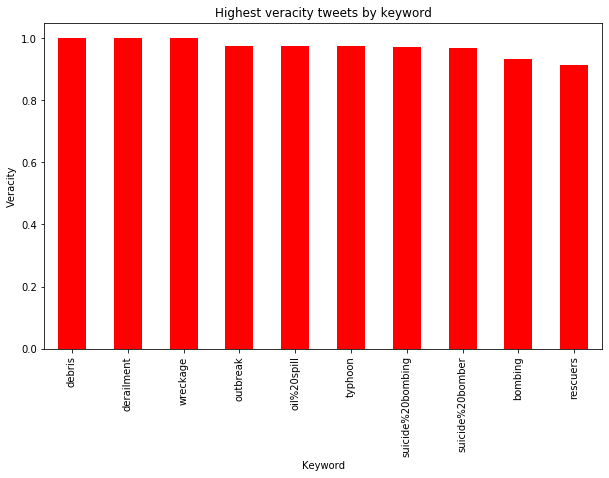

In [19]:
#top 10 keyword con mayor veracidad
keyword_grouped['target'].nlargest(10).plot(kind='bar',title='Highest veracity tweets by keyword',linewidth=2,figsize=(10,6), color='red');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')

### Hacemos un top 10 de las keyword que no pertenecen a tweets de catastrofes

Text(0.5, 0, 'Keyword')

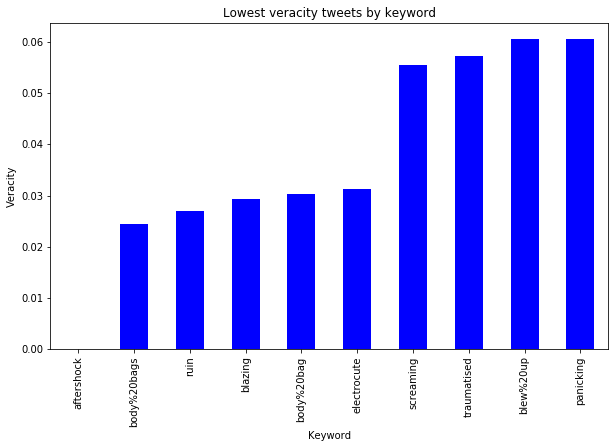

In [20]:
#top 10 keyword con menor veracidad
keyword_grouped['target'].nsmallest(10).plot(kind='bar',title='Lowest veracity tweets by keyword',linewidth=2,figsize=(10,6), color='blue');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')

### Vemos que keywords tiene un porcentaje de veracidad mayor al 75%

In [21]:
#Filtro por los keyword de mayor veracidad
Higher_avg_keyword_grouped = keyword_grouped[keyword_grouped.target > 0.75]
Higher_avg_keyword_grouped.count()

target    29
dtype: int64

Text(0.5, 0, 'Keyword')

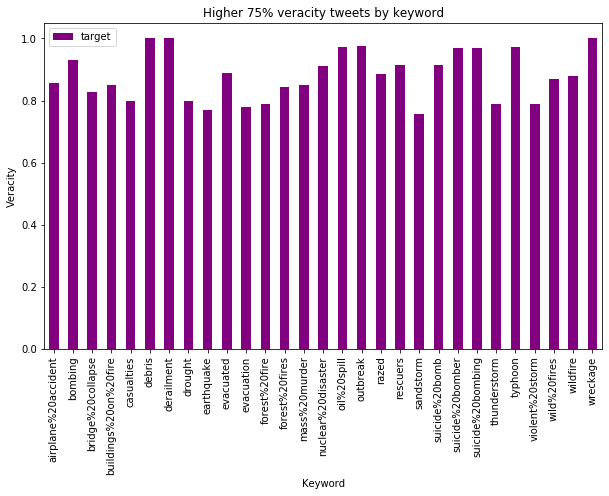

In [22]:

Higher_avg_keyword_grouped.plot(kind='bar',title='Higher 75% veracity tweets by keyword',linewidth=2,figsize=(10,6), color='purple');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')

### Vemos que keywords tiene un porcentaje de veracidad menor al 25%

In [23]:
#Filtro por los keyword de menor veracidad
Lower_avg_keyword_grouped = keyword_grouped[keyword_grouped.target < 0.25]
Lower_avg_keyword_grouped.count()

target    76
dtype: int64

Text(0.5, 0, 'Keyword')

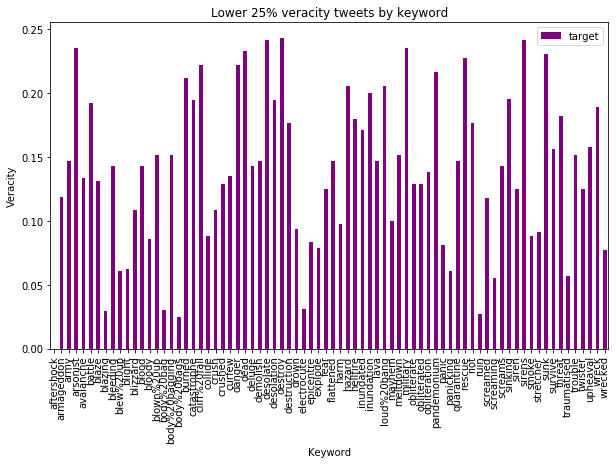

In [24]:

Lower_avg_keyword_grouped.plot(kind='bar',title='Lower 25% veracity tweets by keyword',linewidth=2,figsize=(10,6), color='purple');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')

### Cuento cuantas veces los keyword aparecen en tweets que son verdad

In [25]:
keyword_grouped = tweets.loc[:,['keyword','target']].groupby('keyword').agg({'target': ['mean','sum','count']})
level1 = keyword_grouped.columns.get_level_values(1)
level0 = keyword_grouped.columns.get_level_values(0)
keyword_grouped.columns = level0 + '_' + level1
keyword_grouped.head(5)

,target_mean,target_sum,target_count
keyword,,,
ablaze,0.361111,13,36
accident,0.685714,24,35
aftershock,0.000000,0,34
airplane%20accident,0.857143,30,35
ambulance,0.526316,20,38


[Text(0, 0.5, 'Keywords with same frequency'),
 Text(0.5, 0, 'True tweet keyword frequency')]

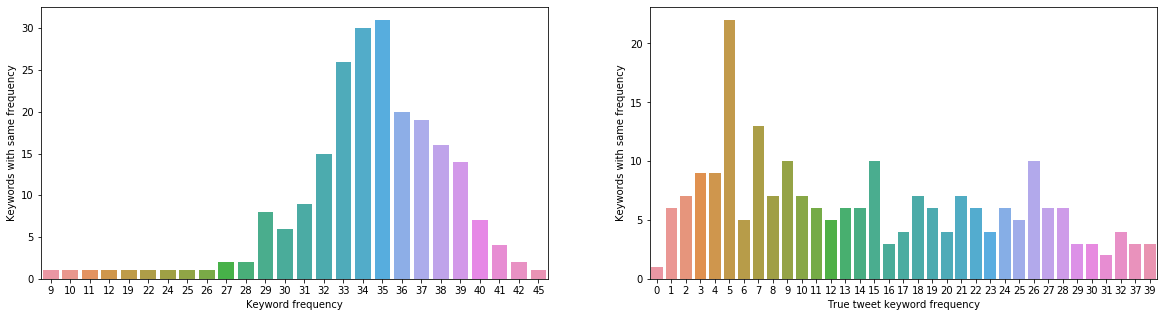

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x='target_count', data = keyword_grouped, ax=axes[0])
sns.countplot(x='target_sum', data = keyword_grouped, ax=axes[1])
axes[0].set(xlabel='Keyword frequency', ylabel='Keywords with same frequency')
axes[1].set(xlabel='True tweet keyword frequency', ylabel='Keywords with same frequency')


## Relacion entre la cantidad de veces que aparece un keyword y su veracidad

### Scatter Plot

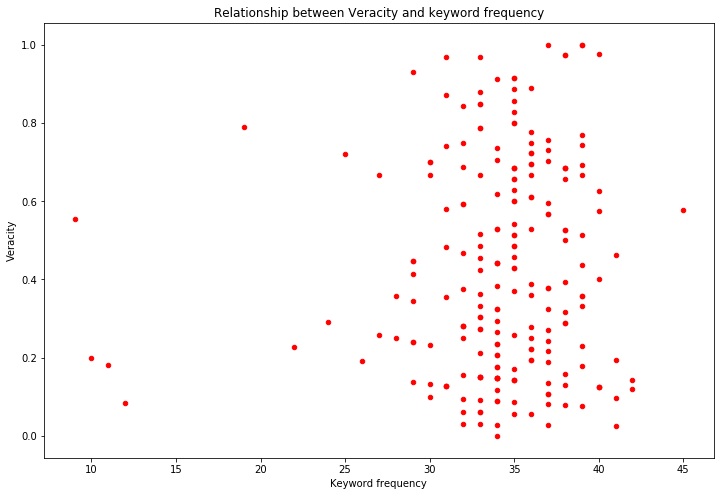

In [27]:
#Veracidad segun la cantidad de apariciones de un keyword, scatterplot
keyword_grouped.plot.scatter('target_count','target_mean', title='Relationship between Veracity and keyword frequency',figsize=(12,8), color='red');
ax=plt.gca()
ax.set_ylabel('Veracity')
ax.set_xlabel('Keyword frequency');

### Box Plot

Text(0, 0.5, 'Veracity')

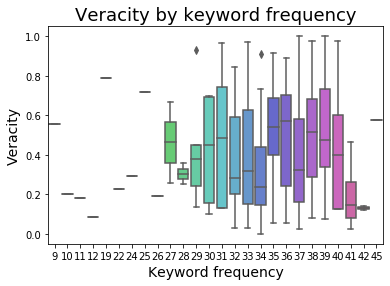

In [28]:
#veracidad segun la cantidad de apariciones del keyword, boxplot
g = sns.boxplot(x="target_count", y="target_mean", 
                     data=keyword_grouped, palette="hls")
g.set_title("Veracity by keyword frequency", fontsize=18)
g.set_xlabel("Keyword frequency", fontsize=14)
g.set_ylabel("Veracity", fontsize=14)

## Relacion entre keywords de tweets que siempre son verdad o no

In [29]:
true_or_false_keyword = keyword_grouped[(keyword_grouped['target_mean'] == 0) | (keyword_grouped['target_mean'] == 1 )]
true_or_false_keyword

,target_mean,target_sum,target_count
keyword,,,
aftershock,0.0,0,34
debris,1.0,37,37
derailment,1.0,39,39
wreckage,1.0,39,39


Text(0.5, 0, 'Keyword')

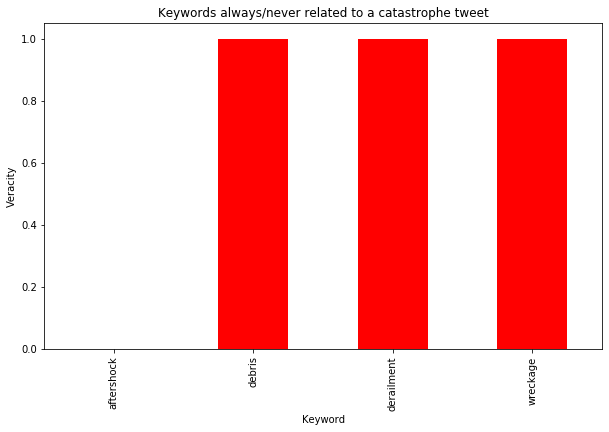

In [30]:
#Keywords que siempre son verdad o no
true_or_false_keyword.target_mean.plot(kind='bar',title='Keywords always/never related to a catastrophe tweet',linewidth=2,figsize=(10,6), color='red');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')

## Relacion entre tweets que tienen keyword y los que no tienen

In [31]:
tweets['has_keyword']=tweets['keyword'] == tweets['keyword']
tweets.loc[tweets["has_keyword"] == True,"has_keyword"] = 1
tweets.loc[tweets["has_keyword"] == False ,"has_keyword"] = 0
tweets.head(5)

,id,keyword,location,text,target,text_len,has_keyword
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0


In [32]:
hasKeyword_grouped = tweets.groupby('has_keyword').agg({'target':['sum','count','mean','std']})
level1 = hasKeyword_grouped.columns.get_level_values(1)
level0 = hasKeyword_grouped.columns.get_level_values(0)
hasKeyword_grouped.columns = level0 + '_' + level1
hasKeyword_grouped.rename(columns = {'target_sum':'target','target_count' : 'tweets'}, inplace = True)
hasKeyword_grouped

,target,tweets,target_mean,target_std
has_keyword,,,,
0,42,61,0.688525,0.466940
1,3229,7552,0.427569,0.494759


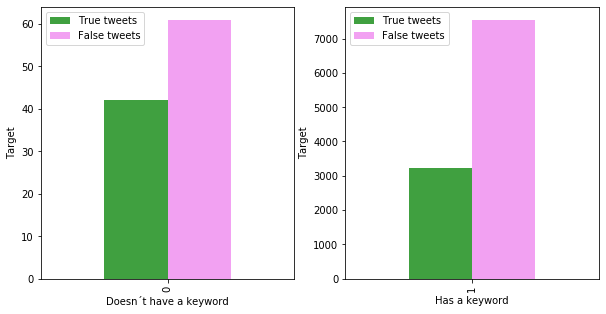

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
hasKeyword_grouped.loc[[0],['target','tweets']].plot(kind="bar", stacked=False,color=("green","violet"),alpha=0.75, ax=axes[0])
hasKeyword_grouped.loc[[1],['target','tweets']].plot(kind="bar", stacked=False,color=("green","violet"),alpha=0.75, ax=axes[1])
axes[0].set(xlabel='Doesn´t have a keyword', ylabel='Target')
axes[1].set(xlabel='Has a keyword', ylabel='Target')
for ax in axes.flat:
    ax.legend(("True tweets","False tweets"))

#### La cantidad de muestras para los que no tienen keywords es muy poca, 100 contra  7500.

## Siguiente tema ???

In [34]:
keyword_grouped.target_mean.mean()

0.4248901532730263

In [35]:
Higher_than_mean_keyword_grouped = keyword_grouped[keyword_grouped.target_mean > keyword_grouped.target_mean.mean()]

In [36]:
Higher_than_mean_keyword_grouped.head(5)

,target_mean,target_sum,target_count
keyword,,,
accident,0.685714,24,35
airplane%20accident,0.857143,30,35
ambulance,0.526316,20,38
arson,0.687500,22,32
attack,0.694444,25,36


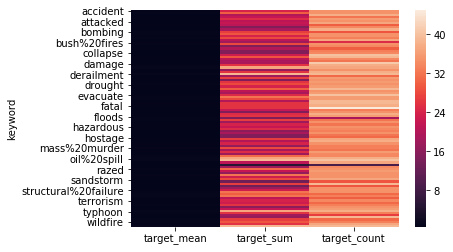

In [37]:
ax = sns.heatmap(Higher_than_mean_keyword_grouped)

## Hay tweets cuya keyword no aparece en el texto

### Esta vez solo tomamos a aquellas keyword que realmente estan dentro del tweet

In [60]:
tweets_dropped = tweets[tweets.keyword.isnull() == 0]
tweets['keyword_count'] = tweets_dropped.apply(lambda x: x['keyword'] in x['text'], axis=1)
tweets_keyword_dropped = tweets[tweets['keyword_count'] == True]
tweets_keyword_dropped.head(5)

,id,keyword,location,text,target,text_len,has_keyword,keyword_count
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,1,True
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,1,True
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,1,True
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,122,1,True
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,140,1,True


In [62]:
dropped_keyword_grouped = tweets_keyword_dropped.groupby('keyword').agg({'target' : ['sum','count']})
level1 = dropped_keyword_grouped.columns.get_level_values(1)
level0 = dropped_keyword_grouped.columns.get_level_values(0)
dropped_keyword_grouped.columns = level0 + '_' + level1
dropped_keyword_grouped.head(5)

,target_sum,target_count
keyword,,
ablaze,10,21
accident,10,21
aftershock,0,4
ambulance,19,31
annihilated,6,25


In [93]:
dropped_keyword_grouped_higher_than_mean = dropped_keyword_grouped[dropped_keyword_grouped.target_sum > dropped_keyword_grouped.target_sum.mean()]
dropped_keyword_grouped_higher_than_mean.target_sum.nlargest(5)

keyword
outbreak      35
evacuated     25
debris        24
derailed      24
derailment    24
Name: target_sum, dtype: int64

Text(0, 0.5, 'Quantity')

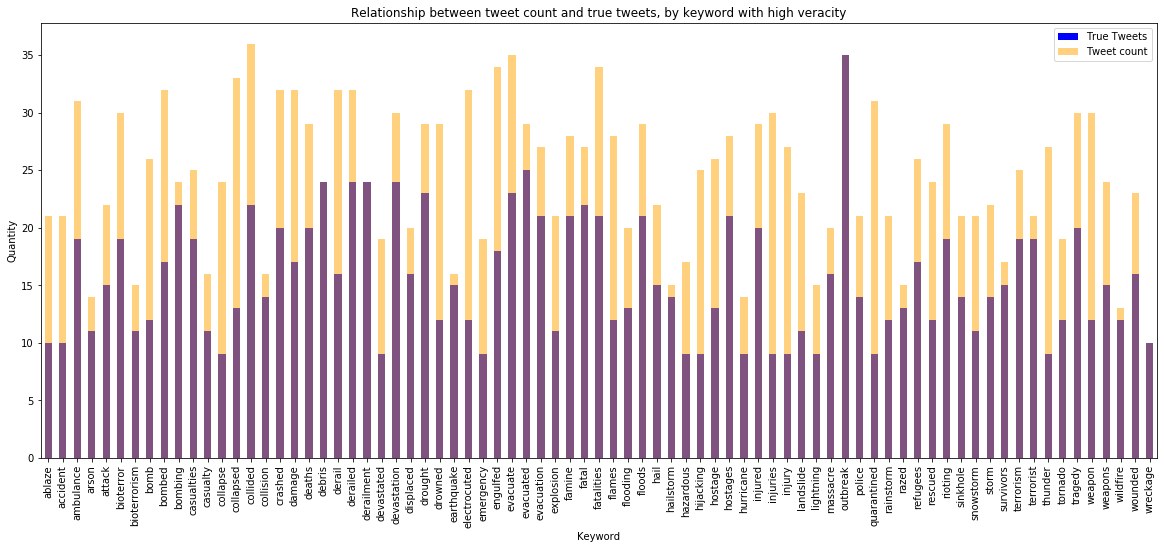

In [102]:
ax = dropped_keyword_grouped_higher_than_mean.target_sum.plot(kind='bar',label ='True Tweets',linewidth=4,figsize=(20,8), color='blue', legend=True);
ax = dropped_keyword_grouped_higher_than_mean.target_count.plot(kind='bar',label ='Tweet count',linewidth=4,figsize=(20,8), color='orange', legend=True, alpha=0.5);
ax.set_title("Relationship between tweet count and true tweets, by keyword with high veracity")
ax.set_xlabel("Keyword")
ax.set_ylabel("Quantity")

In [96]:
dropped_keyword_grouped_lower_than_mean = dropped_keyword_grouped[dropped_keyword_grouped.target_sum < dropped_keyword_grouped.target_sum.mean()]
dropped_keyword_grouped_lower_than_mean.head(5)

,target_sum,target_count
keyword,,
aftershock,0,4
annihilated,6,25
annihilation,3,8
apocalypse,4,15
armageddon,1,5


Text(0, 0.5, 'Keyword')

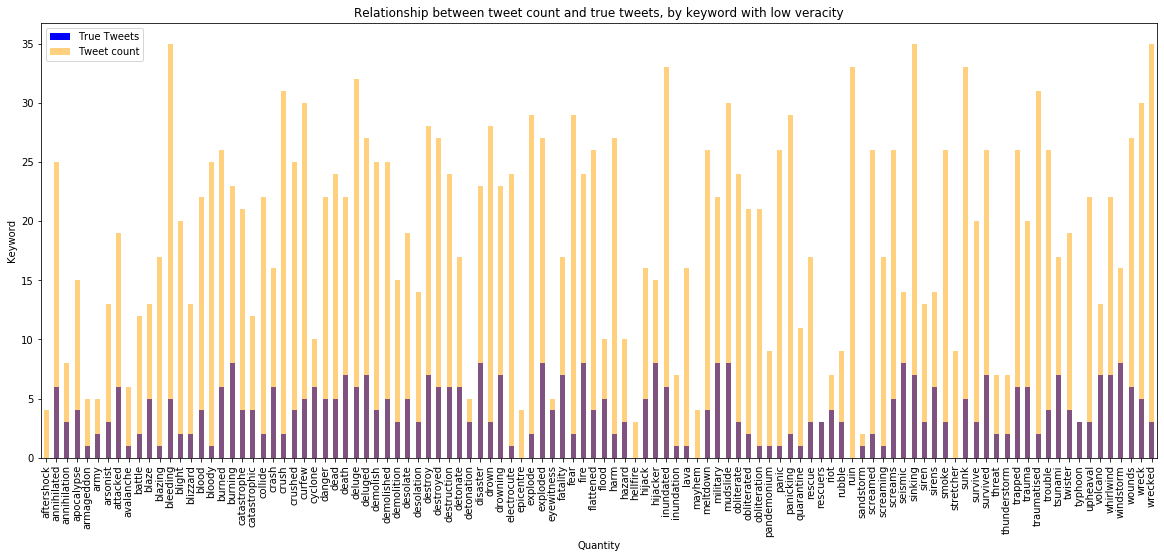

In [101]:
ax = dropped_keyword_grouped_lower_than_mean.target_sum.plot(kind='bar',label ='True Tweets',linewidth=4,figsize=(20,8), color='blue', legend=True);
ax = dropped_keyword_grouped_lower_than_mean.target_count.plot(kind='bar',label ='Tweet count',linewidth=4,figsize=(20,8), color='orange', legend=True, alpha=0.5);
ax.set_title("Relationship between tweet count and true tweets, by keyword with low veracity")
ax.set_xlabel("Quantity")
ax.set_ylabel("Keyword")